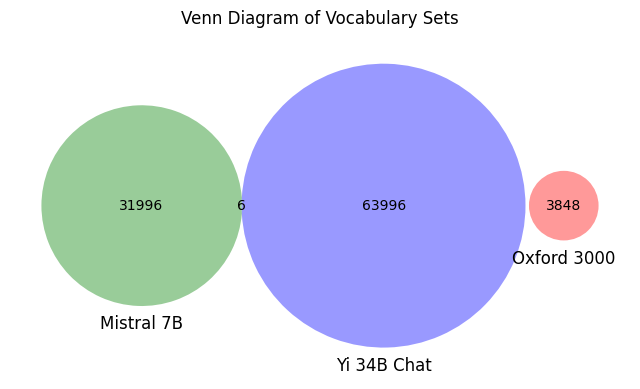

In [1]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


def get_vocab_set(path: str) -> set:
    with open(f"vocab/{path}", "r") as f:
        vocab = set(word.strip() for word in f.readlines())
    return vocab


# 讀取詞匯集
oxford_3000 = get_vocab_set("common_english_words/oxford_3000.txt")
mistral_7b = get_vocab_set("Mistral-7B-v0.1.json")
yi_34b_chat = get_vocab_set("Yi-34B-Chat.json")

# 計算交集
oxford_mistral_intersection = len(oxford_3000 & mistral_7b)
oxford_yi_intersection = len(oxford_3000 & yi_34b_chat)
mistral_yi_intersection = len(mistral_7b & yi_34b_chat)
all_three_intersection = len(oxford_3000 & mistral_7b & yi_34b_chat)

# 使用matplotlib_venn繪製文氏圖
venn_sets = {
    "100": len(oxford_3000)
    - oxford_mistral_intersection
    - oxford_yi_intersection
    + all_three_intersection,
    "010": len(mistral_7b)
    - oxford_mistral_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "001": len(yi_34b_chat)
    - oxford_yi_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "110": oxford_mistral_intersection - all_three_intersection,
    "101": oxford_yi_intersection - all_three_intersection,
    "011": mistral_yi_intersection - all_three_intersection,
    "111": all_three_intersection,
}

plt.figure(figsize=(8, 8))
venn3(subsets=venn_sets, set_labels=("Oxford 3000", "Mistral 7B", "Yi 34B Chat"))
plt.title("Venn Diagram of Vocabulary Sets")
plt.show()

In [2]:
1080 / 3000

0.36

In [3]:
1080 / (1080 + 19 + 500)

0.6754221388367729

In [4]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


def get_vocab_set(path: str) -> set:
    with open(f"vocab/{path}", "r") as f:
        vocab = set(word.strip() for word in f.readlines())
    return vocab


# 讀取詞匯集
oxford_3000 = get_vocab_set("common_english_words/oxford-5000.txt")
mistral_7b = get_vocab_set("Mistral-7B-v0.1_vocab.txt")
yi_34b_chat = get_vocab_set("Yi-34B-Chat_vocab.txt")

# 計算交集
oxford_mistral_intersection = len(oxford_3000 & mistral_7b)
oxford_yi_intersection = len(oxford_3000 & yi_34b_chat)
mistral_yi_intersection = len(mistral_7b & yi_34b_chat)
all_three_intersection = len(oxford_3000 & mistral_7b & yi_34b_chat)

# 使用matplotlib_venn繪製文氏圖
venn_sets = {
    "100": len(oxford_3000)
    - oxford_mistral_intersection
    - oxford_yi_intersection
    + all_three_intersection,
    "010": len(mistral_7b)
    - oxford_mistral_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "001": len(yi_34b_chat)
    - oxford_yi_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "110": oxford_mistral_intersection - all_three_intersection,
    "101": oxford_yi_intersection - all_three_intersection,
    "011": mistral_yi_intersection - all_three_intersection,
    "111": all_three_intersection,
}

plt.figure(figsize=(8, 8))
venn3(subsets=venn_sets, set_labels=("Oxford 3000", "Mistral 7B", "Yi 34B Chat"))
plt.title("Venn Diagram of Vocabulary Sets")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'vocab/common_english_words/oxford-5000.txt'

In [ ]:
1252 / 5000

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


def get_vocab_set(path: str) -> set:
    with open(f"vocab/{path}", "r") as f:
        vocab = set(word.strip() for word in f.readlines())
    return vocab


# 讀取詞匯集
oxford_3000 = get_vocab_set(
    "common_english_words/wiki_most_100_common_word_in_english.txt"
)
mistral_7b = get_vocab_set("Mistral-7B-v0.1_vocab.txt")
yi_34b_chat = get_vocab_set("Yi-34B-Chat_vocab.txt")

# 計算交集
oxford_mistral_intersection = len(oxford_3000 & mistral_7b)
oxford_yi_intersection = len(oxford_3000 & yi_34b_chat)
mistral_yi_intersection = len(mistral_7b & yi_34b_chat)
all_three_intersection = len(oxford_3000 & mistral_7b & yi_34b_chat)

# 使用matplotlib_venn繪製文氏圖
venn_sets = {
    "100": len(oxford_3000)
    - oxford_mistral_intersection
    - oxford_yi_intersection
    + all_three_intersection,
    "010": len(mistral_7b)
    - oxford_mistral_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "001": len(yi_34b_chat)
    - oxford_yi_intersection
    - mistral_yi_intersection
    + all_three_intersection,
    "110": oxford_mistral_intersection - all_three_intersection,
    "101": oxford_yi_intersection - all_three_intersection,
    "011": mistral_yi_intersection - all_three_intersection,
    "111": all_three_intersection,
}

plt.figure(figsize=(8, 8))
venn3(
    subsets=venn_sets,
    set_labels=("wiki_most_100_common_word_in_english", "Mistral 7B", "Yi 34B Chat"),
)
plt.title("Venn Diagram of Vocabulary Sets")
plt.show()